In [1]:
%load_ext autoreload
%autoreload 2

In [127]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

from sklearn.metrics import accuracy_score, balanced_accuracy_score, matthews_corrcoef

from src.data.toy_data import *
from src.model.boosted_support_subset import *
from src.visualization.plots import *
from src.utils import *

# Overlapping bivariate normals

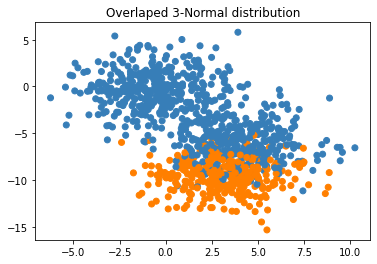

In [145]:
X, y = normal(n=1000, prop_test=0.1, noise=2, centers=3, seed=156899)
plot_toy_set(X, y, 'Overlaped 3-Normal distribution')

## Random forest

In [146]:
rf = RandomForestClassifier(n_estimators=100, max_features='auto', criterion='gini',random_state=1324)

In [147]:
preds = StratifiedKFoldTestPredictions(X, y, rf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.60,0.05,0.65
1,0.06,0.28,0.35
total,0.67,0.33,1.00


In [148]:
rf.fit(X, y)

RandomForestClassifier(random_state=1324)

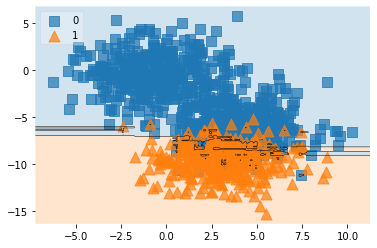

In [149]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, rf, title='')

## SVM

In [150]:
svm = SVC(C=1, gamma = 0.1)

In [151]:
preds = StratifiedKFoldTestPredictions(X, y, svm)
confusion_matrix(svm.predict(X), y)

real,0,1,total
pred,,,
0,0.61,0.04,0.65
1,0.05,0.29,0.35
total,0.67,0.33,1.00


In [152]:
svm.fit(X, y)

SVC(C=1, gamma=0.1)

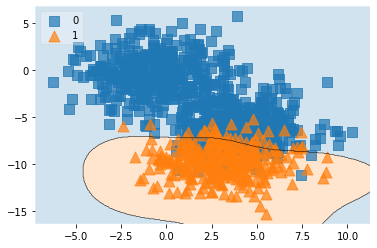

In [153]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, svm, title='')

## BSS

In [169]:
clf = BoostedSupportSubset(sample_size=500, n_learners=10)

In [170]:
clf.fit(X, y)

In [171]:
preds = StratifiedKFoldTestPredictions(X, y, clf)
confusion_matrix(preds, y)

real,0,1,total
pred,,,
0,0.62,0.05,0.67
1,0.05,0.28,0.33
total,0.67,0.33,1.00


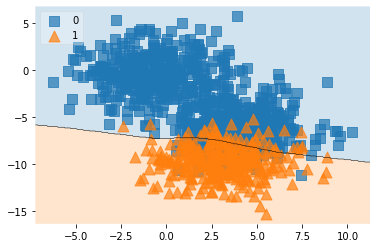

In [172]:
fig1 = plt.gcf()
custom_decision_region_plot(X, y, clf, title='')

### Limited learners detail

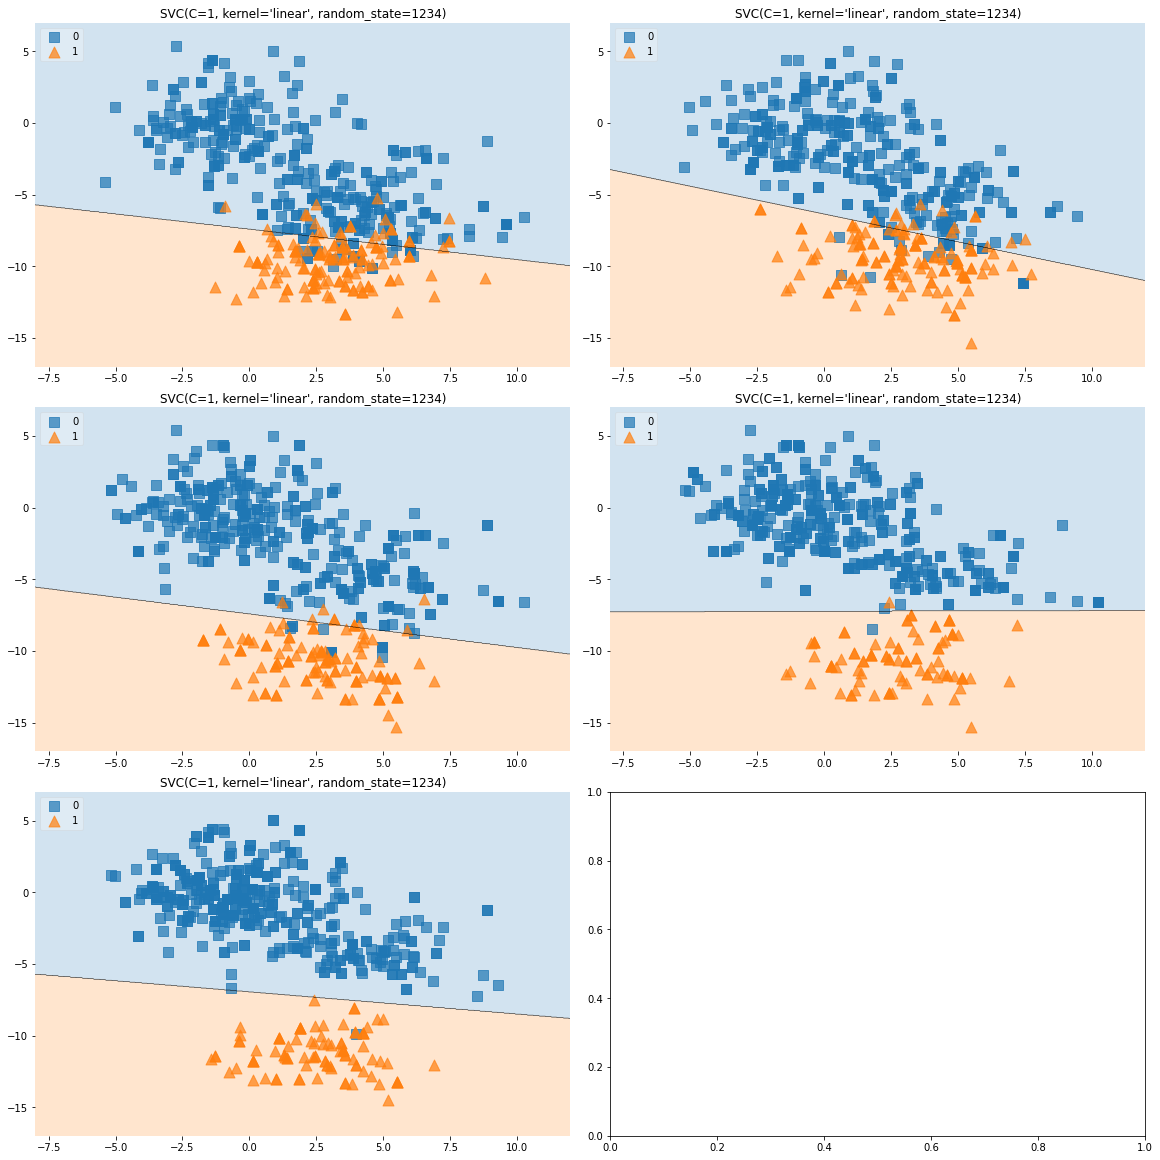

In [173]:
learners = [learner for learner in clf.learners if learner['learner'] is not None]
learners_decision_regions_plot(X, y, learners, zoom=0.1)